In [1]:
from qiskit import QuantumCircuit, QuantumRegister, BasicAer, IBMQ, execute

from qiskit.tools.monitor import job_monitor

from qiskit.quantum_info import *

from qiskit.circuit import Parameter

from qiskit.ignis.verification import *

%config InlineBackend.figure_format = 'svg'

from math import pi

# useful additional packages 
from qiskit.tools.visualization import plot_state_city
from qiskit.providers.ibmq import least_busy

In [2]:
x1 = Parameter('$x_1$')
y1 = Parameter('$y_1$')
z1 = Parameter('$z_1$')

x2 = Parameter('$x_2$')
y2 = Parameter('$y_2$')
z2 = Parameter('$z_2$')

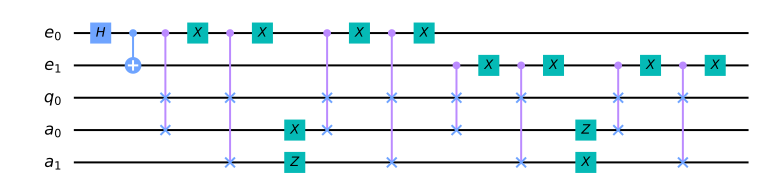

In [13]:
#Entangled pair
e = QuantumRegister(2, name='e')

q = QuantumRegister(1, name='q')
a = QuantumRegister(2, name='a')
switch = QuantumCircuit(e, q, a, name='$\mathcal{S}$')

#Entanglement
switch.h(0)
switch.cnot(0,1)

switch.barrier()

switch.cswap(0,2,3)
switch.x(0)
switch.cswap(0,2,4)
switch.x(0)

switch.barrier()

switch.x(3)
switch.z(4)

switch.barrier()

switch.cswap(0,2,3)
switch.x(0)
switch.cswap(0,2,4)
switch.x(0)

switch.barrier()


switch.cswap(1,2,3)
switch.x(1)
switch.cswap(1,2,4)
switch.x(1)

switch.barrier()

switch.z(3)
switch.x(4)

switch.barrier()

switch.cswap(1,2,3)
switch.x(1)
switch.cswap(1,2,4)
switch.x(1)

switch.draw(output='mpl', plot_barriers=False, scale=0.5)

In [4]:
account = IBMQ.load_account()

In [22]:
circuits = process_tomography_circuits(switch, q)

In [26]:
provider = IBMQ.get_provider('ibm-q')
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))
j = execute(circuits, backend=backend, shots=8192)
job_monitor(j)

Job Status: job has successfully run


In [27]:
fitter = ProcessTomographyFitter(results, circuits)
choi = fitter.fit()

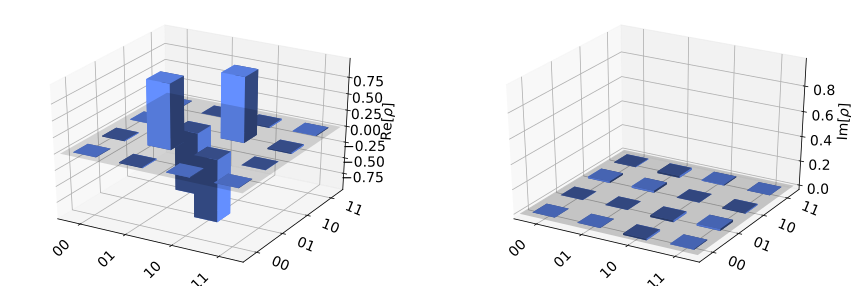

In [28]:
plot_state_city(choi.data)